# Vector Pipeline

## Setting Path

In [1]:
import sys
sys.path.append('../Code Files')
sys.path.append('../Data')

## Import Libraries

In [2]:
#Import sklearn stuff
import datetime

#numpy 
import numpy as np

#Import External Files
from KFoldCV_Vector import KFoldCV
from train_test_Vector import TrainTest
from DataGeneration_Vector import generate_data

#preprocessing 
from sklearn.preprocessing import StandardScaler

#plotting 
import matplotlib.pyplot as plt


## Import Data

In [3]:
import pickle

file= open("//Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Vector Regression Baseline/Data/Bounded_Var_Time:2024-04-15 19:35:40, intercept:5,n_train:5000, n_test:1000, tensor_dimensions:[32 32], tensor_mode_ranks:[4 4], separation_rank:2.pkl", 'rb')
data = pickle.load(file)
file.close()

X_train_Full = data[0]
print(data[0].shape)

Y_train_Full = data[1].reshape(-1,1)
print(Y_train_Full.shape)

X_test_Full = data[2]
print(data[2].shape)

Y_test_Full = data[3].reshape(-1,1)
print(Y_test_Full.shape)

B_tensored = data[4]
print(data[4].shape)

tensor_dimensions = np.array([32, 32])
tensor_mode_ranks = np.array([4, 4])
separation_rank = 2


(5000, 32, 32)
(5000, 1)
(1000, 32, 32)
(1000, 1)
(32, 32)


## Subset Data

In [5]:
n_train = 500
n_test = 400

## Run Experiments

In [6]:
print('Number of Samples:',n_train,'---------------------------------------------------------------------------------------------------------------------------')

#Subset X_train and Y_train
  
# Assuming X_train_Full and Y_train_Full are your full training dataset and labels
# and n_train is the number of samples you want to select randomly

# Generate random indices without replacement for training data
train_indices = np.random.choice(X_train_Full.shape[0], n_train, replace=False)

# Select the random samples and corresponding labels
X_train = X_train_Full[train_indices, :, :]
Y_train = Y_train_Full[train_indices]

# Assuming X_test_Full and Y_test_Full are your full testing dataset and labels
# and n_test is the number of samples you want to select randomly

# Generate random indices without replacement for testing data
test_indices = np.random.choice(X_test_Full.shape[0], n_test, replace=False)

# Select the random samples and corresponding labels
X_test = X_test_Full[test_indices, :, :]
Y_test = Y_test_Full[test_indices]

#Vectorize them!
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Initialize StandardScaler
scaler = StandardScaler() #standard scalar only

# Fit scaler on train data and transform train data
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data using the scaler fitted on train data
X_test_scaled = scaler.transform(X_test)

#Reassign

X_train = X_train_scaled
X_test = X_test_scaled

print("Sample mean for each feature (across samples):",scaler.mean_)

#vectorizing everything 

X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
B_tensored = B_tensored.reshape(X_train.shape[1],-1)

lambdas = [0,0.1,0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, 2.5, 3, 5, 4,10,15,20,50,100]
k_folds = 10
best_lambda, validation_normalized_estimation_errors, validation_nmse_losses, validation_correlations, validation_R2_scores, objective_function_values = KFoldCV(X_train, Y_train, B_tensored, lambdas, k_folds, intercept = True)

Number of Samples: 500 ---------------------------------------------------------------------------------------------------------------------------
Sample mean for each feature (across samples): [5.02026868 5.03219    5.02493559 ... 5.00043881 5.02516391 5.0070851 ]
(1024, 1) (50, 1) (50, 1)
Train Intercept: 72.95380401611328
Fold = 0, lambda = 0, NEE: 0.9970403255689733, NMSE: 1.6475199790856632, Correlation: 0.3296668263824159, R^2 Score: -22.657487869262695, Objective Function Value: 518638.64094794006
(1024, 1) (50, 1) (50, 1)
Train Intercept: 72.92135620117188
Fold = 0, lambda = 0.1, NEE: 0.9959023112451626, NMSE: 1.6488379585107067, Correlation: 0.33031159177068525, R^2 Score: -22.676410675048828, Objective Function Value: 519147.5952279952
(1024, 1) (50, 1) (50, 1)
Train Intercept: 72.87071990966797
Fold = 0, lambda = 0.3, NEE: 0.9946550572261896, NMSE: 1.6470950688435249, Correlation: 0.33012858740846573, R^2 Score: -22.651384353637695, Objective Function Value: 518786.273265313

In [7]:
test_normalized_estimation_error, test_nmse_loss, test_correlation, test_R2_score, Y_test_predicted = TrainTest(X_train, Y_train, X_test, Y_test, B_tensored, best_lambda, intercept= True)

#Get current time and store in variable
formatted_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

NEE: 0.6594441611001779, NMSE: 0.03367378811906451, Correlation: 0.689705526895269, R^2 Score: 0.4748379588127136, Intercept: 82.65950012207031


In [8]:
print('best_lamda:',best_lambda)
print(f"Test Normalized Estimation Error: {test_normalized_estimation_error}")
print(f"Test NMSE Loss: {test_nmse_loss}")
print(f"Test Correlation: {test_correlation}")
print(f"Test R2 Score: {test_R2_score}")

print("Validation NMSE Losses: ", validation_nmse_losses)
print("Validation Correlations: ", validation_correlations)
print("Validation R2 Scores: ", validation_R2_scores)

best_lamda: 0
Test Normalized Estimation Error: 0.6594441611001779
Test NMSE Loss: 0.03367378811906451
Test Correlation: 0.689705526895269
Test R2 Score: 0.4748379588127136
Validation NMSE Losses:  [[1.64751998 1.64883796 1.64709507 1.64735097 1.64902608 1.64768042
  1.65058351 1.65096893 1.65685366 1.65589812 1.65421947 1.66336116
  1.65303169 1.67698304 1.69109028 1.7023353  1.74841495 1.77027216]
 [1.3089572  1.30803153 1.31054342 1.31094723 1.31063172 1.31124821
  1.31199378 1.31496987 1.31747613 1.31814578 1.32072685 1.32678077
  1.32678034 1.34178982 1.356149   1.37202836 1.43314922 1.48178617]
 [1.20790305 1.21187068 1.21280541 1.21441322 1.21274265 1.2105353
  1.21529813 1.21679954 1.21483322 1.21526678 1.2211308  1.22638221
  1.22272793 1.23903455 1.25217827 1.26166195 1.31297003 1.35541359]
 [1.24685589 1.25081917 1.25011969 1.25009852 1.25032141 1.2522567
  1.2560067  1.25503079 1.25471651 1.25960831 1.26141964 1.26999208
  1.26659583 1.28829675 1.30549422 1.32008517 1.39341

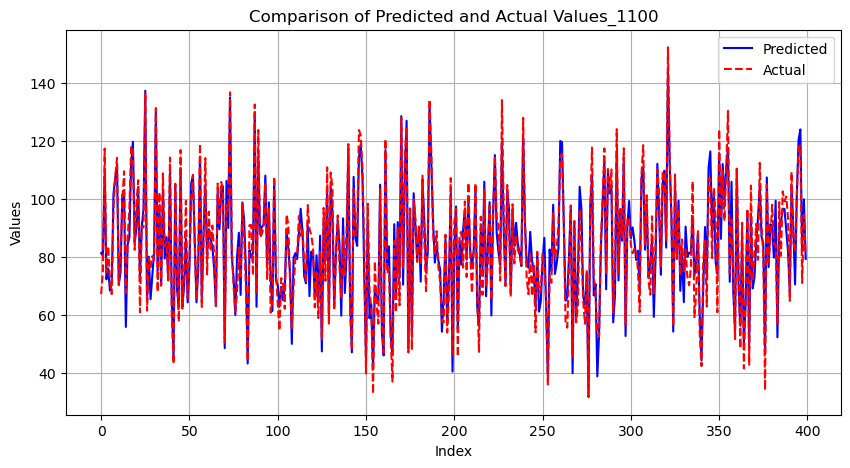

In [26]:
# Plotting both arrays
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(Y_test_predicted, label='Predicted', color='blue')  # Plot Y_test_predicted
plt.plot(Y_test, label='Actual', color='red', linestyle='--')  # Plot Y_test with dashed line
plt.title(f"Comparison of Predicted and Actual Values_{n_train}")  # Title of the plot
plt.xlabel('Index')  # Label for the x-axis
plt.ylabel('Values')  # Label for the y-axis
#plt.yscale('log')
plt.legend()  # Add a legend
plt.grid(True)  # Add gridlines for better readability
plt.show()  # Display the plot